In [58]:
your_name = "Marta Gonzalez"  
your_uid = "115350793"
received_help_from = "If you have received help from others, list them here."

# Assignment 8

For this assignment, you will be using a bank loan data set to see how we can build a classifier that can help identify potential customers who have a higher probability of purchasing the loan. You may read more about the data set at https://www.kaggle.com/itsmesunil/bank-loan-modelling.

**For this assignment, please import necessary packages as you need.** For a good programming style, you should put all import command in the following cell. However, you may also import in the cell where you need to call the API. 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [60]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [61]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [62]:
X = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']].values

In [63]:
y = df['Personal Loan'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

## Exercise 1 Logistic Regression (1 pt)

Please use the LogisticRegression API to implement a logistic regression classifier. More specifically, you should follow these steps:
1. Declare a LogisticRegression object. Note that by default, the scikit-learn package specifies a L2 normalization term for its logistic regression model, you can "disable it" by setting a very large C, such as C=1e20, or specify penalty to be 'none'.
2. Fit the logistic regression model using the training data, that is, X_train and y_train.
3. Evaluate the performance of the logistic regression model on both the training set and the test set.

In [65]:
def ex1():
    # YOUR CODE HERE
    logReg = LogisticRegression(penalty = 'none', max_iter = 10000, random_state = 5).fit(X_train, y_train)
    train_score = logReg.score(X_train, y_train)
    test_score = logReg.score(X_test, y_test)
    return train_score, test_score

In [66]:
ans_train_score, ans_test_score = ex1()
assert abs(ans_train_score - 0.936) < 1e-6, "training score is not as expected."
assert abs(ans_test_score - 0.9344) < 1e-6, "test score is not as expected."

AssertionError: test score is not as expected.

## Exercise 2 Feature Normalization (1 pts)
Next, let's use feature normalization and polynomial feature expension to improve the performance of the model. We have done these two steps on the training set. In this exercise, please apply these steps to the test set. 

**Note that the exact same normalization should be applied to the training and test set. Therefore, the StandardScaler and PolynomialFeatures object should only be "fit" once.**

In [34]:
minmax = MinMaxScaler()
poly = PolynomialFeatures(degree=2)

minmax.fit(X_train)

X_train_scaled = minmax.transform(X_train)
X_train_poly = poly.fit_transform(X_train_scaled)

In [41]:
def ex2(X_test):
    # YOUR CODE HERE
    X_test_scaled = minmax.transform(X_test)
    X_test_poly = poly.fit_transform(X_test_scaled)
    return X_test_poly

In [42]:
X_test_poly = ex2(X_test)

In [43]:
assert X_test_poly.shape == (1250, 66)
assert abs(X_test_poly[1, 1] - 0.84090909) < 1e-6
assert abs(X_test_poly[1247, 2] - 0.39130435) < 1e-6

## Exercise 3 Logistic Regression with New Features (1 pts)
With the normalized and expanded features, we can then re-run the logistic regression to see if that improves the performance. Complete the following function to train a new logistic regression model on X_train_poly and evaluate its performance on both the training set (X_training_poly) and test set (X_test_poly).

This answer may be very similar to `ex1()` but please make sure you are using the curret datasets for training and testing. 

In [81]:
def ex3():
    # YOUR CODE HERE
    logReg = LogisticRegression(penalty = 'none', max_iter = 10000, random_state = 5).fit(X_train_poly, y_train)
    train_score = logReg.score(X_train_poly, y_train)
    test_score = logReg.score(X_test_poly, y_test)
    return train_score, test_score

In [82]:
ex3()

(0.9597333333333333, 0.9472)

In [83]:
ans_train_score, ans_test_score = ex3()
assert abs(ans_train_score - 0.95973333) < 1e-6, "training score is not as expected."
assert abs(ans_test_score - 0.9472) < 1e-6, "test score is not as expected."

## Exercise 1 Cross Validation (1 pts)
In the last exercise, let's see how we can use cross validation to find the best parameter for the Logistic Regression. We have prepared the code for you. Please run the following code block to obtain the training scores and the validation scores (it might take up to one minute to run the code).

Please examinine the train_scores and the validation_scores and determine which value should the parameter C take. You may plot the validation curve as shown in the lab session, or simply calculate and compare the mean. Please Indicate your answer in the corresponding cell.

In [84]:
para_range = [0.01, 0.1, 1, 10, 100, 1000]
logit = LogisticRegression(max_iter=5000, penalty='l2')
train_scores, validation_scores = \
    validation_curve(estimator=logit,
                     X=X_train_poly, 
                     y=y_train, 
                     param_name="C", 
                     param_range=para_range,
                     cv=5)

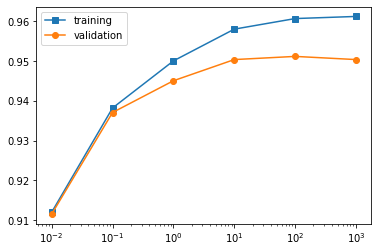

In [85]:
training_score_mean = train_scores.mean(axis=1)
validation_score_mean = validation_scores.mean(axis=1)

plt.plot(para_range, training_score_mean, 's-', label="training")
plt.plot(para_range, validation_score_mean, 'o-', label="validation")
plt.xscale("log")
plt.legend()

In [86]:
# Please incidate your answer of the best C based on the cross validation result.
# For example, if you believe the best C is x, you can simply write `return x`

def best_c():
    # YOUR CODE HERE
    return 100

In [87]:
# This cell contains hidden test to determine if your `best_c()` function returns the correct value of C.
# For example, if the currect answer is x, then assertion is as follows:
# assert abs(best_c() - x) < 1e-6


## Bonus Exercise (up to 0.3 pts)
Instead of using Logistic Regression, can you repeat the previous steps and train a Linear SVM model? The Linear SVM model has been implemented as LinearSVC, which we have imported for you. Repeat the steps (building classifier, expanding and normalizing features, cross validations) to see how well Linear SVC performs on the same data.

Tentative grading scheme for this bonus exercise would be: 0.1 pts for SVM, 0.1 pts for feature normalization, 0.1 pts for cross validation.

In [ ]:
# Feel free to add additional code blocks for your bonus exercise.